In [1]:
#import training and testing dataset
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2023-08-07 11:41:19--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2023-08-07 11:41:19--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbc3443621a8d8cabc178c7851e.dl.dropboxusercontent.com/cd/0/inline/CBXhFd8tVricIKBeA_3iBcFH2lN09QydZJzMOtn4Hd-foo1iIEqD_q_dfzmqn-mp-_B3gve23aGnKpBlWsEQ3MGNHGHiXcerS1V563GbCuq7v-ywCxcOS-MISSjmYunpoEMLUxgvvoEkld1hYy2K_F7M/file# [following]
--2023-08-07 11:41:20--  https://ucbc3443621a8d8cabc178c7851e.dl.dropboxusercontent.com/cd/0/inline/CBXhFd8tVricIKBeA_3iBcFH2lN09QydZJzMOtn4Hd-foo1iIEqD_q_dfzmqn-mp-_B3gve23aGnKpBlWsEQ3MGNHG

In [2]:
#unzipping the dataset
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [3]:
#impoet necessaries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

In [4]:
#initialize the parameter
image_width, image_height = 150, 150
training_data_dir = r"/content/training_set/training_set"
validation_data_dir = r"/content/test_set/test_set"
nb_batch_sample = 100
epochs = 20
batch_size = 20

In [5]:
#checking shapes of the images
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape =(3, image_width, image_height)
else:
    input_shape =(image_width, image_height, 3)

In [19]:
#image generation to train model
train_data_generation = ImageDataGenerator (rescale=1. /255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
test_data_generation = ImageDataGenerator (rescale=1. /255)

train_generator = train_data_generation.flow_from_directory(training_data_dir, target_size =(image_width,image_height), batch_size=batch_size, class_mode='binary', classes=['cats','dogs'])
validation_generator = test_data_generation.flow_from_directory(validation_data_dir, target_size =(image_width,image_height), batch_size=batch_size, class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [20]:
#building CNN Model
model = Sequential([
    Conv2D(64, (3,3), input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                22429760  
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
__________________________________________

In [21]:
#compile the model
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [22]:
#train the model
training=model.fit(
    train_generator,
    steps_per_epoch = nb_batch_sample,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_batch_sample
)

Epoch 1/20
100/100 [==============================] - 19s 180ms/step - loss: 1.5578 - accuracy: 0.4932 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 2/20
100/100 [==============================] - 16s 160ms/step - loss: 0.6941 - accuracy: 0.5190 - val_loss: 0.6876 - val_accuracy: 0.5860
Epoch 3/20
100/100 [==============================] - 16s 159ms/step - loss: 0.6934 - accuracy: 0.5525 - val_loss: 0.6774 - val_accuracy: 0.5210
Epoch 4/20
100/100 [==============================] - 18s 184ms/step - loss: 0.6792 - accuracy: 0.5705 - val_loss: 0.7666 - val_accuracy: 0.5005
Epoch 5/20
100/100 [==============================] - 23s 232ms/step - loss: 0.6732 - accuracy: 0.5935 - val_loss: 0.6808 - val_accuracy: 0.5210
Epoch 6/20
100/100 [==============================] - 20s 200ms/step - loss: 0.6615 - accuracy: 0.6126 - val_loss: 0.6437 - val_accuracy: 0.6120
Epoch 7/20
100/100 [==============================] - 24s 243ms/step - loss: 0.6562 - accuracy: 0.6217 - val_loss: 0.6524 - val_ac

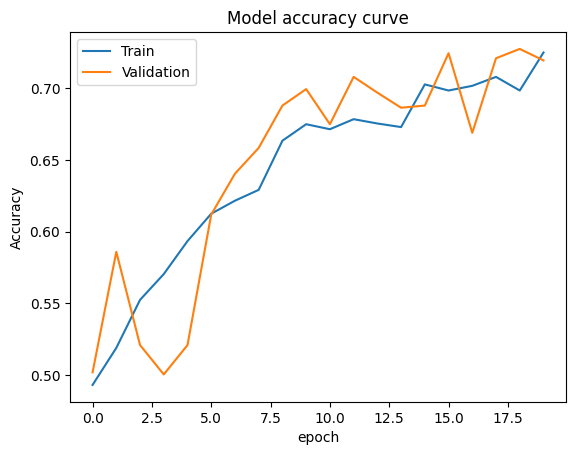

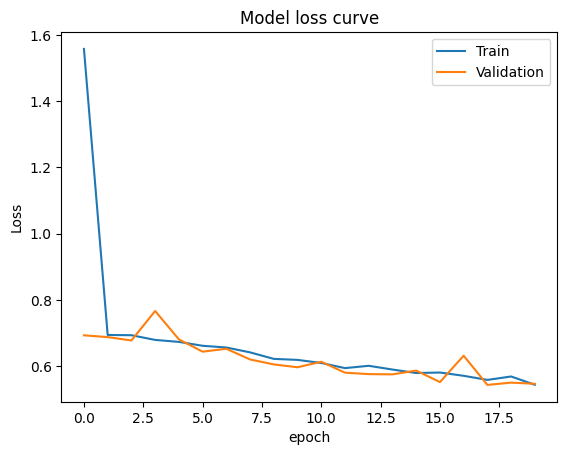

In [23]:
#plotting accuracy and loss of the model
plt.plot(training.history['accuracy'], label="Train")
plt.plot(training.history['val_accuracy'], label="Validation")
plt.title('Model accuracy curve')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.savefig('AccuracyCurve.png')
plt.show()

plt.plot(training.history['loss'], label="Train")
plt.plot(training.history['val_loss'], label="Validation")
plt.title('Model loss curve')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.savefig('LossCurve.png')
plt.show()

In [31]:
#Predicting Image
from tensorflow.keras.preprocessing import image
import numpy as np

def predictProccessing(image_predicting):
  image_predicting = image.img_to_array(image_predicting)
  image_predicting = np.expand_dims(image_predicting, axis=0)

  result = model.predict(image_predicting)
  if(result[0][0] >= 0.5):
    print("It is a Dog!")
  else:
    print("It is a Cat!")


#dog test
predictProccessing(image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg", target_size=(image_width, image_height)))

#cat test
predictProccessing(image.load_img("/content/test_set/test_set/cats/cat.4012.jpg", target_size=(image_width, image_height)))

1/1 [==============================] - 0s 20ms/step
It is a Dog!
1/1 [==============================] - 0s 23ms/step
It is a Cat!
